### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_l, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [2]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [150.0, 0.097836, 0.00682578, 0.00958013, 0.00503788, 0.0433964, 38.941, 9.94827, 0.00294624, 0.0222821]
# max num of steps
num_steps=10000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.01 secs, 364 evals, 272 steps, improv/step: 0.397 (last = 0.3971), fitness=41204.284395352
100.05 secs, 729 evals, 635 steps, improv/step: 0.299 (last = 0.2259), fitness=23826.762053173
150.06 secs, 1094 evals, 1000 steps, improv/step: 0.270 (last = 0.2192), fitness=23817.944427128
200.07 secs, 1460 evals, 1366 steps, improv/step: 0.247 (last = 0.1831), fitness=21927.744988036
250.17 secs, 1827 evals, 1733 steps, improv/step: 0.237 (last = 0.1989), fitness=18921.415382552
300.17 secs, 2194 evals, 2100 steps, improv/step: 0.229 (last = 0.1907), fitness=17742.805700821
350.29 secs, 2563 evals, 2469 steps, improv/step: 0.224 (last = 0.2005), fitness=15466.367429056
400.39 secs, 2933 evals, 2839 steps, improv/step: 0.221 (last = 0.1973), fitness=15392.633221033
450.43 secs, 3303 evals, 320

┌ Warning: Optimization interrupted, recovering intermediate results...
└ @ BlackBoxOptim /home/farnazm/.julia/packages/BlackBoxOptim/ZdVko/src/opt_controller.jl:458


(12907.67986279574, [50.13522863687442, 0.00997265504912845, 0.008497383458679456, 0.07040678158598838, 0.04311284446107294, 0.02293067482399054, 39.995546615034264, 34.9278596303866, 6.261050120894563, 5.157553808378299, 0.007046735202569392, 0.0018172550267355793])

In [3]:
pars=getDDEparams(params, conc_l)

6×8 Array{Float64,2}:
  0.0555324     0.0541965     0.0527856    …   0.00911995   0.0084994 
  0.0277797     0.0282151     0.0286751        0.0429099    0.0431122 
 36.1454       36.2548       36.3703          39.9446      39.9954    
  5.42268       5.44649       5.47164          6.24995      6.26101   
  0.00169306    0.00184511    0.0020057        0.00697587   0.00704651
  0.000436615   0.000475827   0.000517241  …   0.00179898   0.0018172 

### Plot the data with the new set of parameters for DDE

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/plot.jl:29


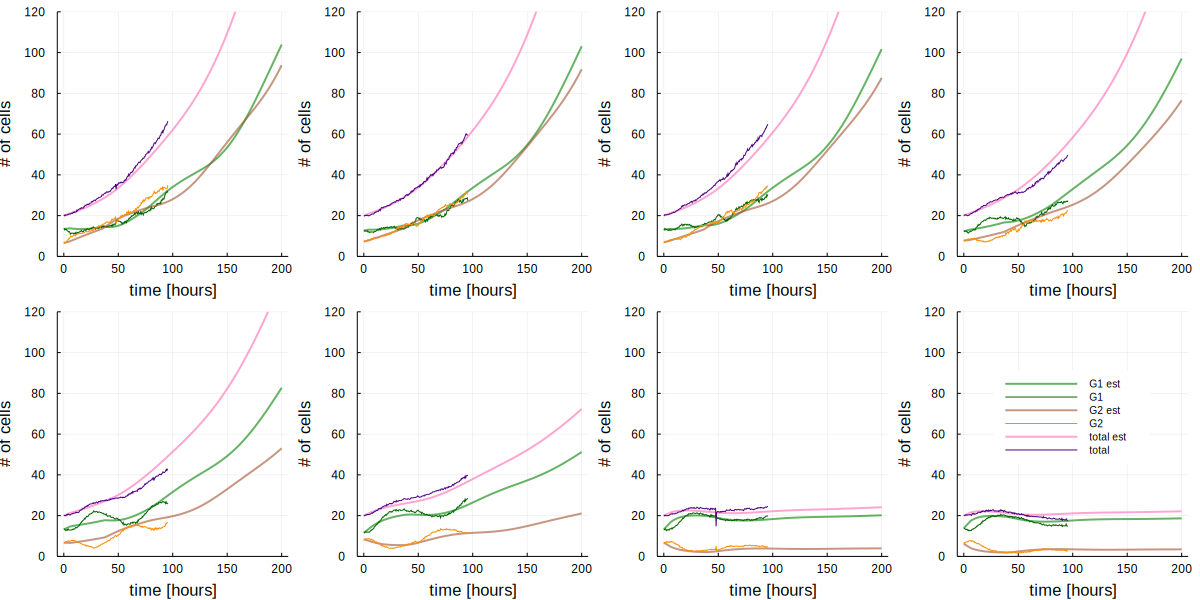

In [4]:
# easy way to convert the hill parameters to DDE parameters
plot_all(pars, popl, g2l, g1l, g2_0l, g1_0l)

### Plot Hill curve for all of the DDE model parameters

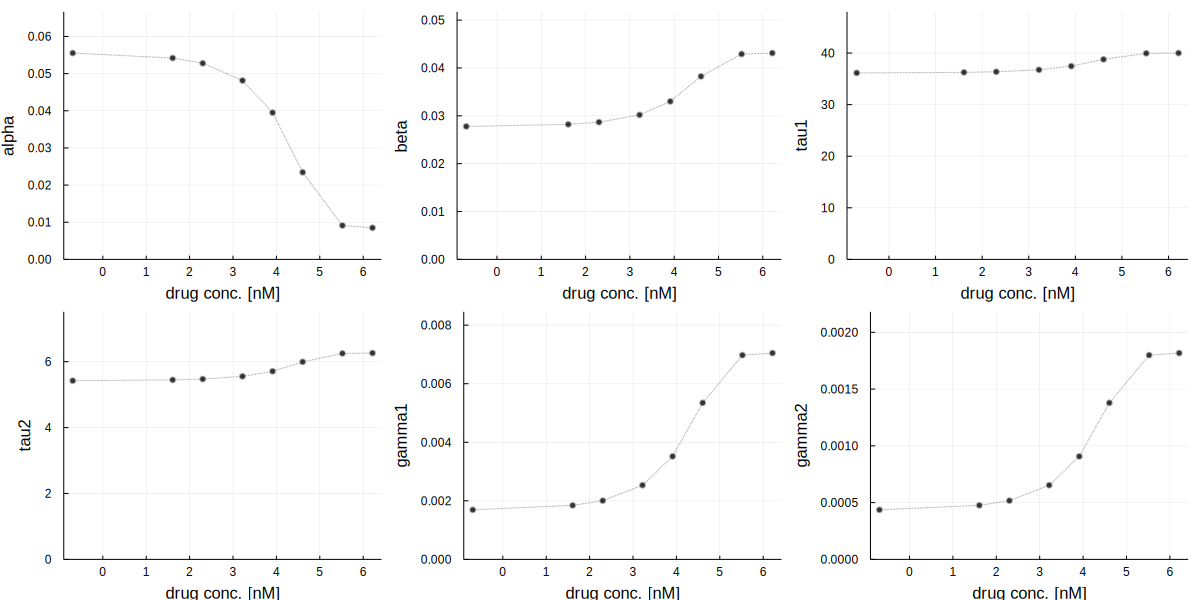

In [5]:
plot_parameters(conc_l, pars)